In [279]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy import stats as sts
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

## Предварительная обработка

In [280]:
df = pd.read_csv('data_all.tsv', sep='\t')
df

,Unnamed: 0,nrooms,meters,floor,floors_total,flat_or_appart,zh_comp,deadline,to_metro,district,area,metro,mainprice,price_per_meter,otdelka,developer
0,0,NaN,NaN,NaN,NaN,NaN,ЖК «River Park Towers Кутузовский»,NaN,5 минут пешком,ЗАО,р-н Дорогомилово,м. Фили,22450632,524547,NaN,Аеон-Девелопмент
1,1,NaN,NaN,NaN,NaN,NaN,ЖК «ÁLIA»,сдача ГК: 2 кв. 2023 года,7 минут пешком,СЗАО,р-н Покровское-Стрешнево,м. Спартак,16122800,335472,NaN,ASTERUS
2,2,1.0,"51,2",41.0,66.0,A,ЖК «NEVA TOWERS»,дом сдан,3 минуты пешком,ЦАО,р-н Пресненский,м. Выставочная,43724800,854000,NaN,Тауэрс
3,3,1.0,"49,8",2.0,18.0,F,ЖК «Luzhniki Collection»,сдача ГК: 4 кв. 2026 года,15 минут пешком,ЦАО,р-н Хамовники,м. Воробьёвы горы,33471000,672108,NaN,Absolute Premium
4,4,NaN,NaN,NaN,NaN,NaN,ЖК «Famous»,сдача ГК: 4 кв. 2023 года,5 минут пешком,ЗАО,р-н Филевский парк,м. Фили,20837134,543908,NaN,MR Group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8224,8224,NaN,NaN,NaN,NaN,NaN,ЖК «Wellton Towers»,NaN,10 минут пешком,СЗАО,р-н Хорошево-Мневники,м. Народное Ополчение,21700000,563636,NaN,Место
8225,8225,1.0,"44,94",3.0,24.0,F,ЖК «Dream Towers»,сдача ГК: 2 кв. 2023 года,5 минут пешком,ЮАО,р-н Нагатинский затон,м. Технопарк,21396534,476113,NaN,Regions Development
8226,8226,1.0,"48,3",12.0,18.0,F,ЖК «Бадаевский»,сдача ГК: 4 кв. 2025 года,16 минут пешком,ЗАО,р-н Дорогомилово,м. Киевская,50232000,1040000,NaN,Capital Group
8227,8227,1.0,"50,2",16.0,24.0,F,"ЖК «HIGH LIFE Летниковская, 11»",NaN,9 минут пешком,ЮАО,р-н Даниловский,м. Павелецкая,33159459,660547,NaN,Пионер


##### Получен датафрейм, содержащий информацию об однокмнатных квартирах и апартаментах в новостройках Москвы. Сначала преобразуем данные, а затем подробнее опишем имеющуюся информацию.

##### 1. Посчитаем количество пропусков в каждом столбце.

In [281]:
df.isna().sum()  

Unnamed: 0            0
nrooms             3336
meters             3336
floor              3336
floors_total       3336
flat_or_appart     3337
zh_comp            1282
deadline           3809
to_metro             30
district            168
area                387
metro               464
mainprice             0
price_per_meter       0
otdelka            7785
developer             0
dtype: int64

##### 2. Столбец "otdelka" удаляем из-за большого числа пропусков, а столбец "nrooms" , в котором содержится информация о количестве комнат в жилом помещении, - так как все квартиры являются однокомнатными.

In [282]:
df = df.drop(columns=['Unnamed: 0', 'nrooms', 'otdelka'])

##### Удалять другие столбцы не будем, заменять пропуски на медианы или нули смысла нет.

##### 3. Площади квартир записаны через запятую, поэтому не могут восприниматься python как дробные числа (float). Изменим это.

In [293]:
df1 = pd.DataFrame(df['meters'])
df1 = df1.stack().str.replace(',','.').unstack()
df['meters'] = df1['meters']
df.head(5)

,meters,floor,floors_total,flat_or_appart,zh_comp,deadline,to_metro,district,area,metro,mainprice,price_per_meter,developer
0,NaN,NaN,NaN,NaN,ЖК «River Park Towers Кутузовский»,NaN,5 минут пешком,ЗАО,р-н Дорогомилово,м. Фили,22450632,524547,Аеон-Девелопмент
1,NaN,NaN,NaN,NaN,ЖК «ÁLIA»,сдача ГК: 2 кв. 2023 года,7 минут пешком,СЗАО,р-н Покровское-Стрешнево,м. Спартак,16122800,335472,ASTERUS
2,51.2,41.0,66.0,A,ЖК «NEVA TOWERS»,дом сдан,3 минуты пешком,ЦАО,р-н Пресненский,м. Выставочная,43724800,854000,Тауэрс
3,49.8,2.0,18.0,F,ЖК «Luzhniki Collection»,сдача ГК: 4 кв. 2026 года,15 минут пешком,ЦАО,р-н Хамовники,м. Воробьёвы горы,33471000,672108,Absolute Premium
4,NaN,NaN,NaN,NaN,ЖК «Famous»,сдача ГК: 4 кв. 2023 года,5 минут пешком,ЗАО,р-н Филевский парк,м. Фили,20837134,543908,MR Group


In [294]:
df['to_metro'].unique()

array(['5 минут пешком', '7 минут пешком', '3 минуты пешком',
       '15 минут пешком', '3 минуты на транспорте', '4 минуты пешком',
       '7 минут на транспорте', '11 минут пешком', '1 минута пешком',
       '13 минут пешком', '8 минут пешком', '14 минут пешком',
       '10 минут пешком', '6 минут пешком', '9 минут пешком',
       '16 минут пешком', '20 минут пешком', '2 минуты пешком',
       '12 минут пешком', '6 минут на транспорте', '17 минут пешком',
       '2 минуты на транспорте', '5 минут на транспорте',
       '18 минут пешком', '19 минут пешком', '4 минуты на транспорте',
       '11 минут на транспорте', '9 минут на транспорте',
       '15 минут на транспорте', '10 минут на транспорте',
       '14 минут на транспорте', '18 минут на транспорте',
       '1 минута на транспорте', nan, '13 минут на транспорте',
       '8 минут на транспорте', '12 минут на транспорте',
       '55 минут на транспорте', '16 минут на транспорте',
       '30 минут на транспорте', '31 минута на транс

##### 4. Видим, что столбец "to_metro" включает себя информацию о времени до метро пешком и на транспорте, поэтому поделим его на два столбца.

In [295]:
df['to_metro'] = df['to_metro'].astype(str)
df['to_metro_on_foot'] = 0
k = 0
for i in df['to_metro_on_foot']:
    if len(df['to_metro'][k]) <= 15 & len(df['to_metro'][k]) > 3:
        df['to_metro_on_foot'][k] = df['to_metro'][k][0:2]   # оставляем только минуты
        k += 1
    else:
        df['to_metro_on_foot'][k] = np.nan
        k += 1
        
df['to_metro_by_transport'] = 0
l = 0
for i in df['to_metro_by_transport']:
    if len(df['to_metro'][l]) > 15:
        df['to_metro_by_transport'][l] = df['to_metro'][l][0:2]   # оставляем только минуты
        l += 1
    else:
        df['to_metro_by_transport'][l] = np.nan
        l += 1

C:\Users\ousko\AppData\Local\Temp\ipykernel_1784\2032576025.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['to_metro_on_foot'][k] = df['to_metro'][k][0:2]   # оставляем только минуты
C:\Users\ousko\AppData\Local\Temp\ipykernel_1784\2032576025.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['to_metro_by_transport'][l] = np.nan


In [296]:
df['to_metro_on_foot'] = df['to_metro_on_foot'].fillna(0).astype(int)  # меняем формат чисел на int
df['to_metro_on_foot'] = df['to_metro_on_foot'].replace(0, np.nan)  # возвращаем NaN
df['to_metro_by_transport'] = df['to_metro_by_transport'].fillna(0).astype(int)  # меняем формат чисел на int
df['to_metro_by_transport'] = df['to_metro_by_transport'].replace(0, np.nan)  # возвращаем NaN

In [297]:
df = df.drop('to_metro', axis=1)  # удаляем столбец "to_metro"
df

,meters,floor,floors_total,flat_or_appart,zh_comp,deadline,district,area,metro,mainprice,price_per_meter,developer,to_metro_on_foot,to_metro_by_transport
0,NaN,NaN,NaN,NaN,ЖК «River Park Towers Кутузовский»,NaN,ЗАО,р-н Дорогомилово,м. Фили,22450632,524547,Аеон-Девелопмент,5.0,NaN
1,NaN,NaN,NaN,NaN,ЖК «ÁLIA»,сдача ГК: 2 кв. 2023 года,СЗАО,р-н Покровское-Стрешнево,м. Спартак,16122800,335472,ASTERUS,7.0,NaN
2,51.2,41.0,66.0,A,ЖК «NEVA TOWERS»,дом сдан,ЦАО,р-н Пресненский,м. Выставочная,43724800,854000,Тауэрс,3.0,NaN
3,49.8,2.0,18.0,F,ЖК «Luzhniki Collection»,сдача ГК: 4 кв. 2026 года,ЦАО,р-н Хамовники,м. Воробьёвы горы,33471000,672108,Absolute Premium,15.0,NaN
4,NaN,NaN,NaN,NaN,ЖК «Famous»,сдача ГК: 4 кв. 2023 года,ЗАО,р-н Филевский парк,м. Фили,20837134,543908,MR Group,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8224,NaN,NaN,NaN,NaN,ЖК «Wellton Towers»,NaN,СЗАО,р-н Хорошево-Мневники,м. Народное Ополчение,21700000,563636,Место,10.0,NaN
8225,44.94,3.0,24.0,F,ЖК «Dream Towers»,сдача ГК: 2 кв. 2023 года,ЮАО,р-н Нагатинский затон,м. Технопарк,21396534,476113,Regions Development,5.0,NaN
8226,48.3,12.0,18.0,F,ЖК «Бадаевский»,сдача ГК: 4 кв. 2025 года,ЗАО,р-н Дорогомилово,м. Киевская,50232000,1040000,Capital Group,16.0,NaN
8227,50.2,16.0,24.0,F,"ЖК «HIGH LIFE Летниковская, 11»",NaN,ЮАО,р-н Даниловский,м. Павелецкая,33159459,660547,Пионер,9.0,NaN


##### Итак, полученный датафрейм включает в себя следующую информацию об однокомнатных квартирах и апартаментах в московских новостройках:
* **meters:** площадь в квадратных метрах;
* **floor:** этаж;
* **floors_total:** общее количество этажей в доме;
* **flat_or_appart:** является ли жилое помещение квартирой (F) или апартаментами (А);
* **zh_comp:** жилой комлекс;
* **deadline:** ввод в эксплуатацию;
* **district:** административный округ;
* **area:** район;
* **metro:** ближайшая станция метро;
* **mainprice:** полная стоимость;
* **price_per_meter:** цена за квадратный метр;
* **developer:** застройщик;
* **to_metro_on_foot:** минуты до метро пешком;
* **to_metro_by_transport:** минуты до метро на транспорте.

## Анализ и визуализация полученных данных 

##### 1. Посчитаем количество уникальных районов, в которых находятся квартиры.

In [298]:
len(df['area'].unique())

117

##### 2. Посмотрим, у каких застройщиков самые высокие цены.

In [299]:
df.groupby('developer')['price_per_meter'].mean().head(10)  

developer
494 УНР                        661000.000000
AFI Development                424666.666667
ALFA real estate               437853.000000
ALVO Group                     621551.250000
ASTERUS                        336381.831818
ATLANT                         571429.000000
Absolute Premium               673515.889908
Acropol                        414957.000000
Alliance Agency Real Estate    366154.000000
BARNES International Realty    488700.500000
Name: price_per_meter, dtype: float64

##### 3. Посмотрим, как соотносятся средние цены квадратного метра по округам.

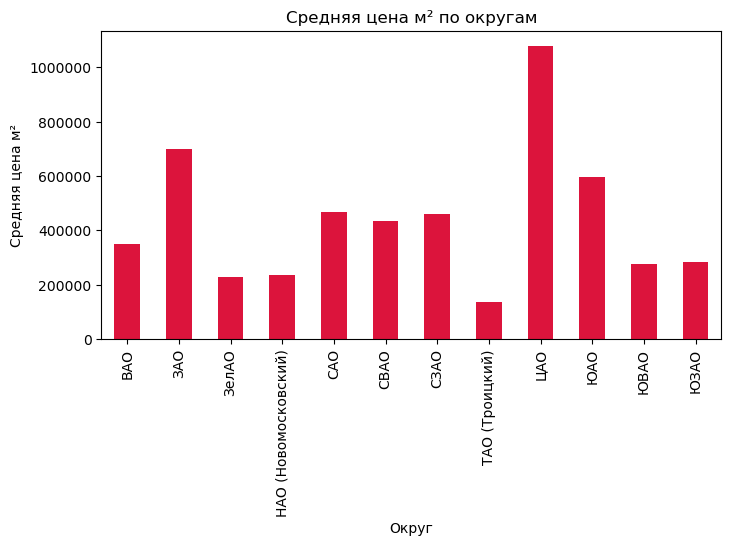

In [300]:
plt.figure(figsize=(8, 4))
plt.ticklabel_format(style = 'plain')
df.groupby(by='district')['price_per_meter'].mean().plot(kind='bar', legend=None, color='crimson');
plt.title('Средняя цена м² по округам')
plt.xlabel('Округ')
plt.ylabel('Средняя цена м²');

##### На гистограмме видно, что наиболее дорогое жильё в новостройках расположено в ЦАО и ЗАО, которые являются наиболее престижными административными округами Москвы. Далее проверим гипотезу о том, что дисперсия цены м² в ЦАО не меньше, чем в ЗАО.

##### 4. Выясним, как соотносятся между собой средние цены квадратного метра в апартаментах и в квартирах.

In [301]:
df.groupby('flat_or_appart')['price_per_meter'].mean()

flat_or_appart
A    818579.312064
F    793512.759321
Name: price_per_meter, dtype: float64

##### Здесь мы видим интересную закономерность, что цена м² в апартаментах в среднем выше цены м² в квартирах. Попробуем исследовать эту связь глубже.

Посмотрим на список округов, которые у нас есть:

In [302]:
X = df['district'].unique()
X = np.delete(X, 11)
X

array(['ЗАО', 'СЗАО', 'ЦАО', 'САО', 'ЮАО', 'СВАО', 'ВАО',
       'НАО (Новомосковский)', 'ЮВАО', 'ЮЗАО', 'ТАО (Троицкий)', 'ЗелАО'],
      dtype=object)

Всего у нас 12 округов.

##### Визуализируем распределение количества квартир и апартаментов по округам

In [303]:
number_of_aps = np.array([])
for i in X:
    z = df[(df['flat_or_appart'] == 'A') & (df['district'] == f'{i}')]
    number_of_aps = np.append(number_of_aps, len(z))

In [304]:
number_of_flats = np.array([])
for i in X:
    z = df[(df['flat_or_appart'] == 'F') & (df['district'] == f'{i}')]
    number_of_flats = np.append(number_of_flats, len(z))

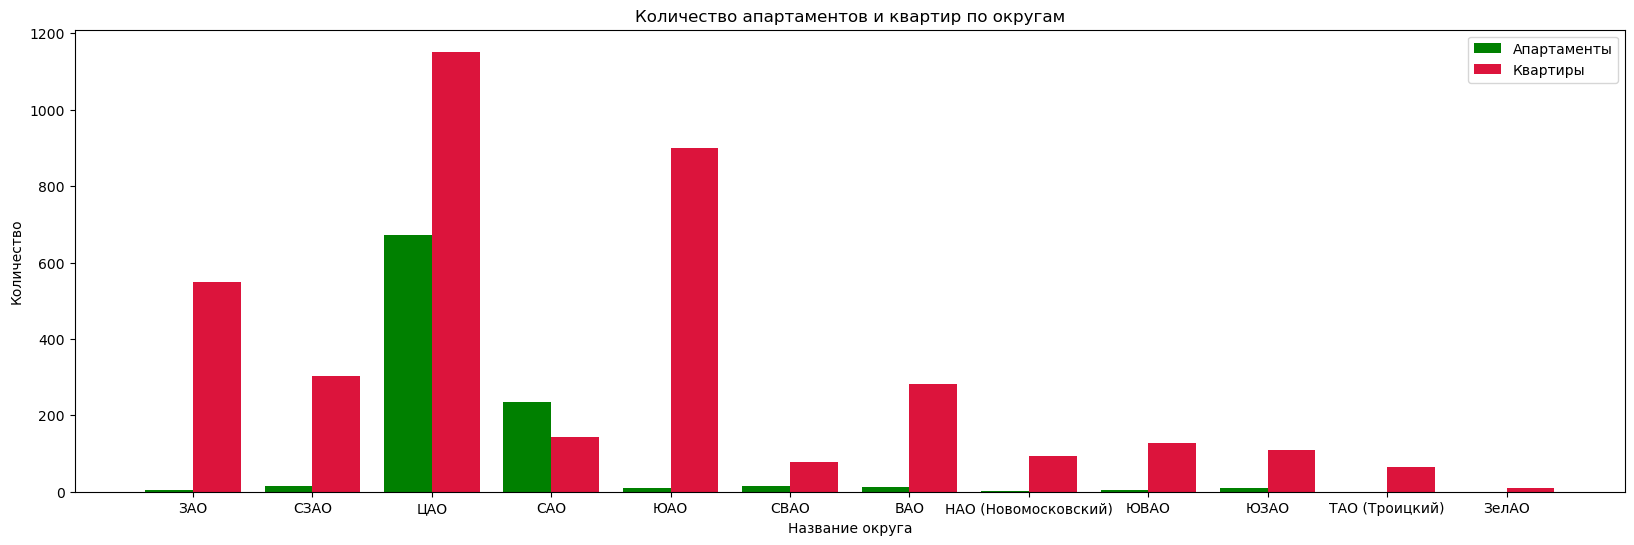

In [305]:
X_axis = np.arange(len(X))
plt.figure(figsize=(20,6))  
plt.bar(X_axis - 0.2, number_of_aps, 0.4, label = 'Апартаменты', color='green')
plt.bar(X_axis + 0.2, number_of_flats, 0.4, label = 'Квартиры', color='crimson')
  
plt.xticks(X_axis, X)
plt.xlabel("Название округа")
plt.ylabel("Количество")
plt.title("Количество апартаментов и квартир по округам")
plt.legend()
plt.show()

##### На графике видно, что большинство апартаментов находится в ЦАО, с этим может быть связана их высокая средняя стоимость. В отдаленных от центра Москвы районах апартаментов почти нет.

##### Теперь исследуем средние цены м² в  квартирах и апартаментах по округам.

In [308]:
price_of_aps = np.array([])
for i in X:
    z = df[(df['flat_or_appart'] == 'A') & (df['district'] == f'{i}')]
    price_of_aps = np.append(price_of_aps, z['price_per_meter'].mean())

In [309]:
price_of_flats = np.array([])
for i in X:
    z = df[(df['flat_or_appart'] == 'F') & (df['district'] == f'{i}')]
    price_of_flats = np.append(price_of_flats, z['price_per_meter'].mean())

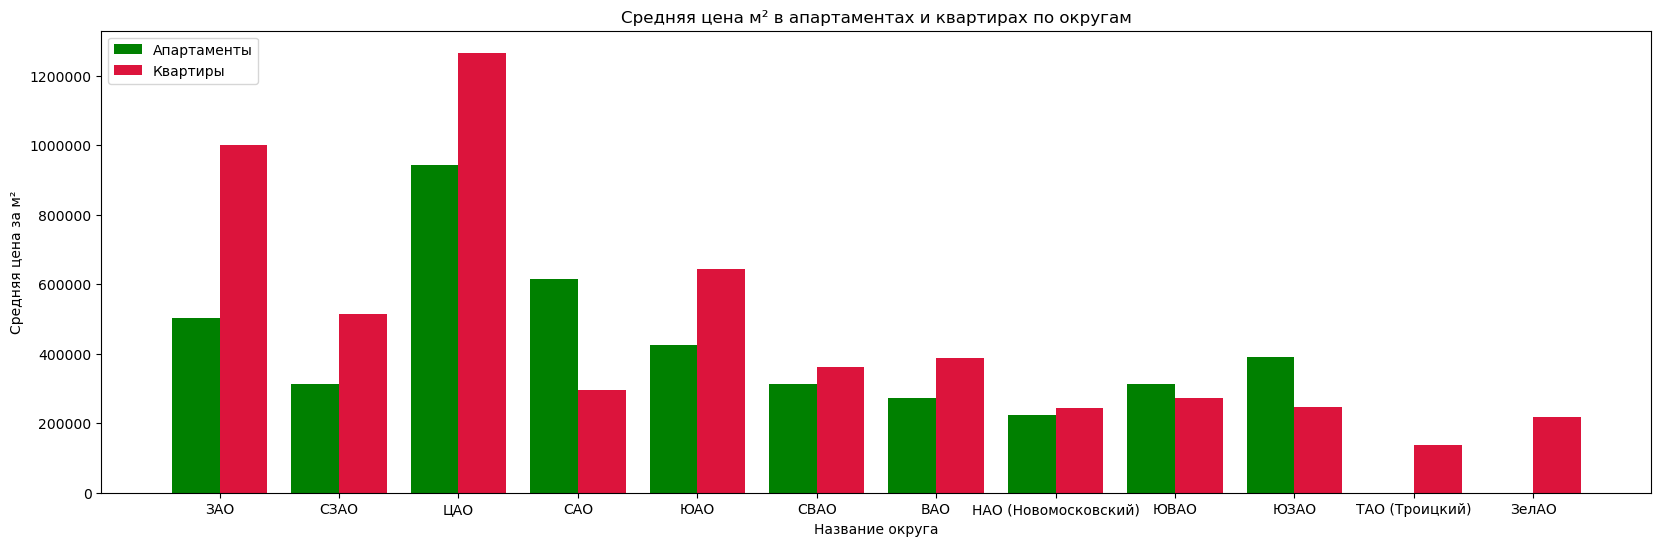

In [310]:
X_axis = np.arange(len(X))

plt.figure(figsize=(20,6)) 
plt.ticklabel_format(style = 'plain')
plt.bar(X_axis - 0.2, price_of_aps, 0.4, label = 'Апартаменты', color='green')
plt.bar(X_axis + 0.2, price_of_flats, 0.4, label = 'Квартиры', color='crimson')
  
plt.xticks(X_axis, X)
plt.xlabel("Название округа")
plt.ylabel("Средняя цена за м²")
plt.title("Средняя цена м² в апартаментах и квартирах по округам")
plt.legend()
plt.show()

##### На графике видно, что в большинстве округов, где есть и квартиры, и апартаменты, квартиры стоят дороже, однако в САО, ЮВАО и ЮЗАО - наоборот. А в среднем, как выяснидось ранее, квадратный метр в апартаментах стоит дороже чем в квартирах, поэтому проверим гипотезу о том, что средняя цена м² в апартаментах не ниже, чем средняя цена м² в квартирах.

##### 5. Исходя из собственного жизненного опыта мы предполагаем, что для недвижимости более низкого ценового сегмента параметр "время до метро пешком" значительно влияет на цену (чем ближе к метро жилье, тем дороже квартира). Также мы думаем, что эта закономерность ослабевает или пропадает для недвижимости более высокого ценового сегмента. Посмотрим, какие результаты получатся на нашей выборке.

##### Сначала возьмем недвижимость с более низким ценником из нашей выборки. Это будет жилье стоимостью ниже 30 миллионов рублей.

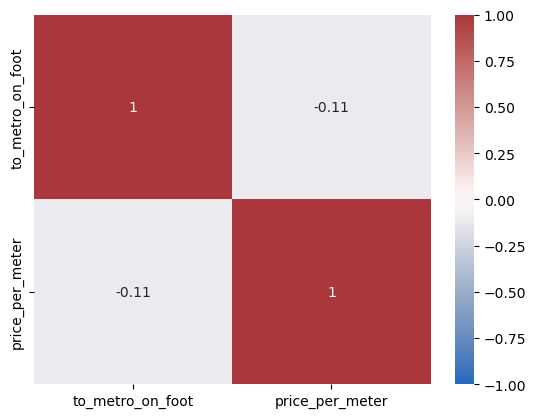

In [311]:
matrix = df[df['mainprice']<30000000][['to_metro_on_foot', 'price_per_meter']].dropna().corr()
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

##### На тепловой карте корреляции мы видим, что есть небольшая обратная зависимость между временем до метро пешком и стоимостью квартиры.

##### Теперь посмотрим на "средний" ценовой сегмент для нашей выборки (по факту это очень приличное жилье, конечно). В нем будет недвижимость стоимостью от 30 до 60 миллионов рублей.

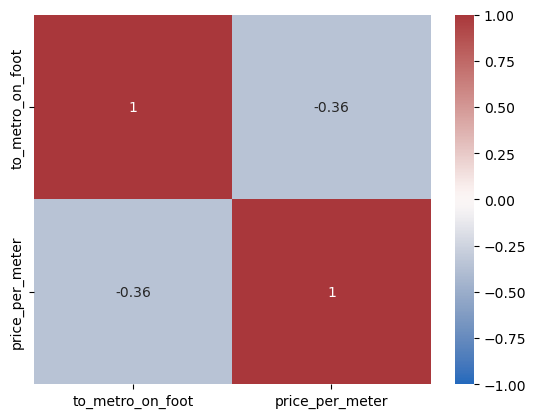

In [312]:
matrix = df[(df['mainprice']>30000000) & (df['mainprice']<60000000)][['to_metro_on_foot', 'price_per_meter']].dropna().corr()
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

##### На тепловой карте корреляции мы видим, что обратная взаимосвязь времени до метро пешком и цены м² недвижимости усилилась больше чем втрое.

##### Наконец оценим эту зависимость для элитной недвижимости стоимостью более 60 миллионов рублей.

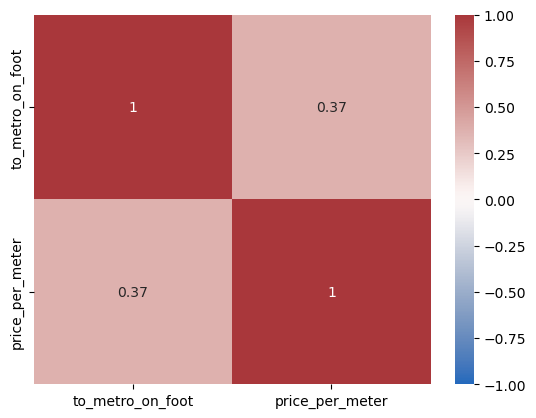

In [313]:
matrix = df[df['mainprice']>60000000][['to_metro_on_foot', 'price_per_meter']].dropna().corr()
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

##### На тепловой карте корреляции мы видим, что для элитной недвижимости ситуацияя иная: чем дальше жилье от метро, тем больше его цена. 

#### Таким образом, для недвижимости стоимостью менее 30 млн руб между временем до метро пешком и ценой жилья существует слабая отрицательная связь (-0,11), для ценового сегмента от 30 до 60 млн руб между переменными существует отрицательная связь средней силы (-0,36), для премиум-сегмента недвижимости стоимостью более 60 млн рублей между временем до метро пешком и ценой жилья существует положительная связь средней силы (0,37). Действительно для более низкого ценового сегмента существует связь «чем ближе к метро жильё, тем оно дороже», для элитной недвижимости такая связь, как и предполагалось, отсутствует.

##### 6. Посмотрим, зависит ли стоимость квадратного метра жилья от этажа.

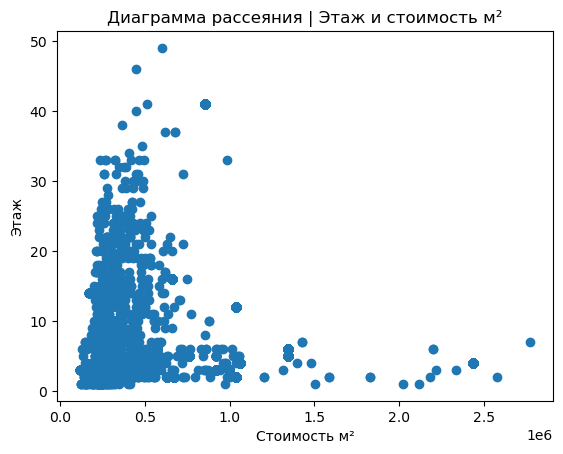

In [314]:
df1 = df[['floor', 'price_per_meter']]
df1 = df1.dropna()

fig, ax = plt.subplots()  
ax.scatter(x = df1['price_per_meter'], y = df1['floor'])
plt.title('Диаграмма рассеяния | Этаж и стоимость м²')
plt.xlabel('Стоимость м²')
plt.ylabel('Этаж');

##### Несмотря на наличие выбросов, можно предположить, что между данными показателями существует слабая положительная линейная связь. Это может быть справедливо, так как в новостройках на последних этажах обычно более высокие потолки, а это повышает стоимость жилья. Такого признака не было в исходной таблице, поэтому переходим к пункту....

## Создание новых признаков

#####  В пунтке "Предварительная обработка" мы уже создавали новые признаки - время до метро пешком и время до метро на транспорте.

##### Теперь мы хотим создать признак "Upper floors", который будет делить квартиры на те, которые находятся на последних двух этажах здания и те, которые не находятся. Если квартира находится на последнем или предпоследнем этаже, в колонке будет стоять 1, в ином случае - 0.

In [315]:
df['upper_floors'] = np.zeros(8229)
for i in range(8229):
    if df['floors_total'][i] - df['floor'][i] <= 1:
        df['upper_floors'][i] = 1

C:\Users\ousko\AppData\Local\Temp\ipykernel_1784\2156340110.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['upper_floors'][i] = 1


In [320]:
df1 = df[(df['floor'] > 0) & (df['floors_total']) > 0]  # убираем NaN в столбцах "floor" и "floors_total"
df1.groupby('upper_floors')['mainprice'].mean()   # средняя стоимость жилья не на двух последних этажах(0)
                                                  # средняя стоимость жилья на двух последних этажах (1)

upper_floors
0.0    4.682811e+07
1.0    3.986843e+07
Name: mainprice, dtype: float64

In [321]:
df1.groupby('upper_floors')['price_per_meter'].mean()   # средняя цена м² на последних этажах (1) 
                                                        # и на всех остальных (0).

upper_floors
0.0    800544.755931
1.0    771861.563050
Name: price_per_meter, dtype: float64

##### Средняя стоимость недвижимости на последнем и предпоследнем этажах оказалась меньше, чем на остальных, но значения достаточно близки. В следующем пункте проверим гипотезу о  равенстве цен м² на двух последних и остальных этажах.

## Гипотезы

#### Итак, по итогам исследования данных мы выдвинули 4 гипотезы:
1. Дисперсия цены м² в москвоских новостройках в ЦАО не меньше, чем в ЗАО.
2. Квадратный метр в апартаментах стоит не дешевле квадратного метра в квартире. 
3. Цены м² в квартирах и апартаментах, находящихся на последних двух этажах и не находящихся на последних этажах, равны.

### Гипотеза 1
Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: σ^2_{ЦАО} ≥ σ^2_{ЗАО} \\
& H_1: σ^2_{ЦАО} < σ^2_{ЗАО}
\end{aligned}
$$

In [322]:
print('Количество жилых помещений в ЦАО: ', len(df[df['district'] == 'ЦАО']))
print('Количество жилых помещений в ЗАО: ', len(df[df['district'] == 'ЗАО']))

Количество жилых помещений в ЦАО:  2344
Количество жилых помещений в ЗАО:  1543


In [323]:
# Найдём стандартные отклонения цены м² в ЦАО и ЗАО: 
df.groupby('district')['price_per_meter'].std()[['ЦАО', 'ЗАО']] 

district
ЦАО    484603.005116
ЗАО    323212.308709
Name: price_per_meter, dtype: float64

In [327]:
alpha = 0.05
F_crit = sts.f.ppf(1-alpha, 1543-1, 2344-1)
F_stat = 323212.308709**2/484603.005116**2  # чтобы в H1 был знак >
if F_stat < F_crit:
    print('H0 не отвергается')
else:
    print('H0 отвергается')

H0 не отвергается


#### Таким образом, дисперсия цены м² в квартирах и апартаментах в ЦАО действительно не меньше, чем в ЗАО. Это объясняется тем, что в Центральном административном округе цена м² наиболее сильно зависит от близости к центру. В ЗАО разброс цен ниже, так как отсутствуют настолько же сильные "точки притяжения", как в ЦАО.

## Гипотеза 2
Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{A} ≥ \mu_{F} \\
& H_1: \mu_{A} < \mu_{F}
\end{aligned}
$$
##### μA - математическое ожидание цены м² в апартаментах.
##### μF - математическое ожидание цены м² в квартирах.

#### Наблюдения независимые и их количество достаточно большое, поэтому можно использовать z-тест.

In [328]:
print('Количество апартаментов:', len(df[df['flat_or_appart'] == 'A']))
print('Количество квартир:', len(df[df['flat_or_appart'] == 'F']))

Количество апартаментов: 1003
Количество квартир: 3889


In [329]:
apart_mean = df[df['flat_or_appart'] == 'A']['price_per_meter'].mean()
flat_mean = df[df['flat_or_appart'] == 'F']['price_per_meter'].mean()
apart_var = df[df['flat_or_appart'] == 'A']['price_per_meter'].var()
flat_var = df[df['flat_or_appart'] == 'F']['price_per_meter'].var()

In [330]:
alpha = 0.05
z_crit = sts.norm.ppf(1-alpha)
z_stat = (flat_mean - apart_mean)/np.sqrt(apart_var/1003 + flat_var/3889)
if z_stat < z_crit:
    print('H0 не отвергается')
else:
    print('H0 отвергается')

H0 не отвергается


#### Значит, можно говорить о том, что в новостройках Москвы стоимость квадратного метра в апартаментах выше аналогичного показателя в квартирах.

## Гипотеза 3
Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{1} = \mu_{0} \\
& H_1: \mu_{1} \neq \mu_{0}
\end{aligned}
$$
##### μ0 - математическое ожидание цены м²  в жилье, находящемся не на последних этажах.
##### μ1 - математическое ожидание цены м² в жилье, находящемся на последних этажах.

In [332]:
print('Количество квартир и апартаментов, находящихся не на последнем и предпоследнем этажах:', len(df1[df1['upper_floors'] == 0]))
print('Количество квартир и апартаментов на последнем и предпоследнем этажах: ', len(df1[df1['upper_floors'] == 1]))

Количество квартир и апартаментов, находящихся не на последнем и предпоследнем этажах: 4552
Количество квартир и апартаментов на последнем и предпоследнем этажах:  341


#### Наблюдения независимые и их количество  достаточно большое, что говорит о том, что истинные дисперсии хорошо аппроксимируются выборочными, поэтому можно использовать z-тест.

In [333]:
df1.groupby('upper_floors')['price_per_meter'].std()   # берём датафрейм, в котором нет NaN в столбцах "floor" и "floors_total"

upper_floors
0.0    493216.858283
1.0    363055.382666
Name: price_per_meter, dtype: float64

In [334]:
alpha = 0.05
z_crit = sts.norm.ppf(1-alpha/2)
z_stat = (771861.563050 - 800544.755931)/np.sqrt(363055.382666**2/341 + 493216.858283**2/4552) # средние были посчитаны в
                                                                                            # пункте "Создание новых признаков"
if (z_stat < z_crit) & (z_stat > -z_crit):
    print('H0 не отвергается')
else:
    print('H0 отвергается')

H0 не отвергается


#### Следовательно, нельзя говорить о том, что стоимость м² в жилье, находящемся на последних этажах, не равна стоимости м² в жилье, не находящемся на последних этажах.

## Машинное обучение

#### Попытаемся обучить модель линейной регрессии предсказывать стоимость квадратного метра на основе данных об этаже, этажности здания, округе, времени до метро (пешком) и типе жилья (апартаменты или квартира).

##### 1. Создадим новый столбец: если квартира - 1, если апартаменты - 0.

In [335]:
df['F/A'] = np.zeros(8229)
for i in range(8229):
    if df['flat_or_appart'][i] == 'F':
        df['F/A'][i] = 1

C:\Users\ousko\AppData\Local\Temp\ipykernel_1784\1358729766.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['F/A'][i] = 1


In [336]:
df2 = df[['floor', 'floors_total', 'district', 'price_per_meter', 'to_metro_on_foot', 'F/A']]  # оставляем нужные столбцы
df2 = df2.dropna()   # удаляем пропуски

In [337]:
df2.district.unique()   # округа, попавшие в выборку

array(['ЦАО', 'САО', 'ЮАО', 'СЗАО', 'ВАО', 'ЗАО', 'НАО (Новомосковский)',
       'ЮЗАО', 'СВАО', 'ЮВАО', 'ТАО (Троицкий)'], dtype=object)

##### 2. Создадим дамми-переменные.

In [338]:
df2[['ЦАО','САО', 'ЮАО', 'СЗАО', 'ВАО', 'ЗАО', 'НАО (Новомосковский)', 'ЮЗАО', 'СВАО', 'ЮВАО', 'ТАО (Троицкий)' ]] = 0
df2 = df2.reset_index()
#df2 = df2.drop(columns = ['index'], axis=1)
df2

,index,floor,floors_total,district,price_per_meter,to_metro_on_foot,F/A,ЦАО,САО,ЮАО,СЗАО,ВАО,ЗАО,НАО (Новомосковский),ЮЗАО,СВАО,ЮВАО,ТАО (Троицкий)
0,2,41.0,66.0,ЦАО,854000,3.0,0.0,0,0,0,0,0,0,0,0,0,0,0
1,3,2.0,18.0,ЦАО,672108,15.0,1.0,0,0,0,0,0,0,0,0,0,0,0
2,6,2.0,17.0,САО,631196,4.0,0.0,0,0,0,0,0,0,0,0,0,0,0
3,8,5.0,11.0,ЮАО,763222,15.0,1.0,0,0,0,0,0,0,0,0,0,0,0
4,10,5.0,8.0,ЦАО,1342000,15.0,1.0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4045,8223,5.0,17.0,ВАО,423768,5.0,1.0,0,0,0,0,0,0,0,0,0,0,0
4046,8225,3.0,24.0,ЮАО,476113,5.0,1.0,0,0,0,0,0,0,0,0,0,0,0
4047,8226,12.0,18.0,ЗАО,1040000,16.0,1.0,0,0,0,0,0,0,0,0,0,0,0
4048,8227,16.0,24.0,ЮАО,660547,9.0,1.0,0,0,0,0,0,0,0,0,0,0,0


In [339]:
for i in range (4050):
    if df2['district'][i] == 'ЦАО':
        df2['ЦАО'][i] = 1
    elif df2['district'][i] == 'САО':
        df2['САО'][i] = 1
    elif df2['district'][i] == 'ЮАО':
        df2['ЮАО'][i] = 1
    elif df2['district'][i] == 'СЗАО':
        df2['СЗАО'][i] = 1
    elif df2['district'][i] == 'ВАО':
        df2['ВАО'][i] = 1
    elif df2['district'][i] == 'ЗАО':
        df2['ЗАО'][i] = 1
    elif df2['district'][i] == 'НАО (Новомосковский)':
        df2['НАО (Новомосковский)'][i] = 1
    elif df2['district'][i] == 'ЮЗАО':
        df2['ЮЗАО'][i] = 1   
    elif df2['district'][i] == 'СВАО':
        df2['СВАО'][i] = 1  
    elif df2['district'][i] == 'ЮВАО':
        df2['ЮВАО'][i] = 1 
df2

C:\Users\ousko\AppData\Local\Temp\ipykernel_1784\927827694.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ЦАО'][i] = 1
C:\Users\ousko\AppData\Local\Temp\ipykernel_1784\927827694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['САО'][i] = 1
C:\Users\ousko\AppData\Local\Temp\ipykernel_1784\927827694.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ЮАО'][i] = 1
C:\Users\ousko\AppData\Local\Temp\ipykernel_1784\927

,index,floor,floors_total,district,price_per_meter,to_metro_on_foot,F/A,ЦАО,САО,ЮАО,СЗАО,ВАО,ЗАО,НАО (Новомосковский),ЮЗАО,СВАО,ЮВАО,ТАО (Троицкий)
0,2,41.0,66.0,ЦАО,854000,3.0,0.0,1,0,0,0,0,0,0,0,0,0,0
1,3,2.0,18.0,ЦАО,672108,15.0,1.0,1,0,0,0,0,0,0,0,0,0,0
2,6,2.0,17.0,САО,631196,4.0,0.0,0,1,0,0,0,0,0,0,0,0,0
3,8,5.0,11.0,ЮАО,763222,15.0,1.0,0,0,1,0,0,0,0,0,0,0,0
4,10,5.0,8.0,ЦАО,1342000,15.0,1.0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4045,8223,5.0,17.0,ВАО,423768,5.0,1.0,0,0,0,0,1,0,0,0,0,0,0
4046,8225,3.0,24.0,ЮАО,476113,5.0,1.0,0,0,1,0,0,0,0,0,0,0,0
4047,8226,12.0,18.0,ЗАО,1040000,16.0,1.0,0,0,0,0,0,1,0,0,0,0,0
4048,8227,16.0,24.0,ЮАО,660547,9.0,1.0,0,0,1,0,0,0,0,0,0,0,0


In [340]:
df2 = df2.drop(columns = ['index'], axis=1) # удаляем колонку index

##### 3. Обучение модели.

In [341]:
df2_train, df2_test = train_test_split(df2, test_size = 0.2, random_state=45)
y_train = df2_train['price_per_meter']
X_train = df2_train.drop(['price_per_meter', 'district'], axis=1) 

y_test = df2_test['price_per_meter']
X_test = df2_test.drop(['price_per_meter', 'district'], axis=1) 

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Свободный член: ', model.intercept_)
print('Коэффиценты: ', model.coef_)

Свободный член:  164671.05189110537
Коэффиценты:  [ 12681.48957798 -11515.76006276   1889.779519   -29834.98610328
 899838.40545183 492937.89330757 600166.99442711 501224.85836757
 355509.60424899 713512.91874317 167870.16549292 238311.36692319
 336834.712633   238501.27988744      0.        ]


##### 4. Расчёт метрик.

In [342]:
print('MAE: ', round(mean_absolute_error(y_test, y_pred), 4))
print('MSE: ', round(mean_squared_error(y_test, y_pred), 4))
print('MAPE: ', round(mean_absolute_percentage_error(y_test, y_pred), 4))

MAE:  120169.1038
MSE:  28485875639.6647
MAPE:  0.2186


#### Таким образом, обученная модель линейной регрессии при предсказании стоимости м²  в среднем ошибается на 120169 рублей.